In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
%matplotlib inline


In [184]:
df = pd.read_csv('FIFA 2018 Statistics.csv')

In [224]:
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

In [187]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [188]:
Teams = df['Team'].unique()
Teams

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

In [189]:
TeamGroups = df.groupby('Team')
TeamGroups.sum()['Goal Scored']

Team
Argentina          6
Australia          2
Belgium           16
Brazil             8
Colombia           6
Costa Rica         2
Croatia           14
Denmark            3
Egypt              2
England           12
France            14
Germany            2
Iceland            2
Iran               2
Japan              6
Korea Republic     3
Mexico             3
Morocco            2
Nigeria            3
Panama             2
Peru               2
Poland             2
Portugal           6
Russia            11
Saudi Arabia       2
Senegal            4
Serbia             2
Spain              7
Sweden             6
Switzerland        5
Tunisia            5
Uruguay            7
Name: Goal Scored, dtype: int64

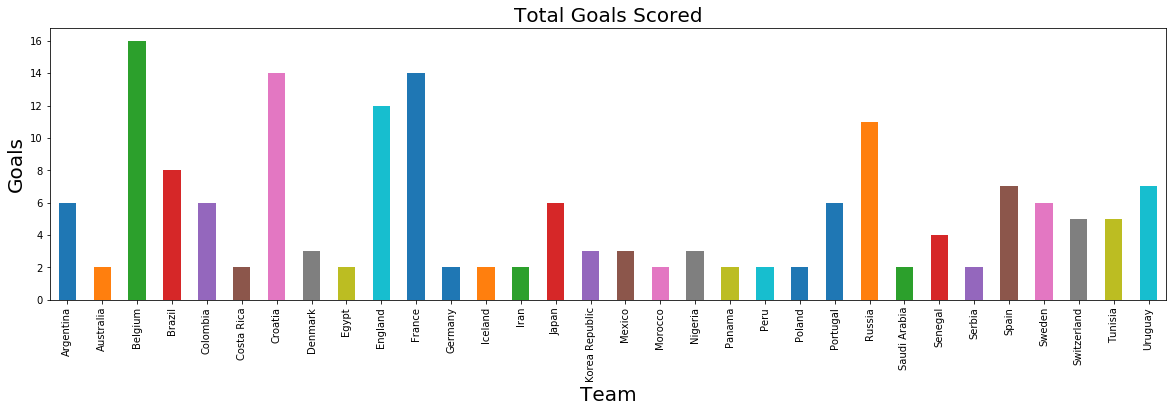

In [190]:
#Comparing the total goals scored by each team throughout the tournament. Goals wins games!
plt.figure(figsize = (20,5))
plt.title('Total Goals Scored', fontsize = 20)
plt.ylabel('Goals', fontsize = 20)
plt.xlabel('Teams', fontsize = 20)
TeamGroups.sum()['Goal Scored'].plot(kind='bar')

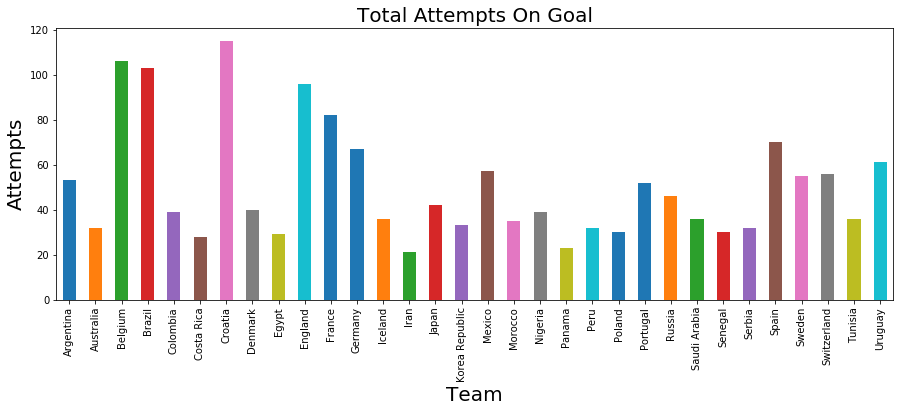

In [191]:
#Comparing the total goal attempts by each team throughout the tournament. Goals wins games!
Goal_Attempts = df.groupby('Team')
plt.figure(figsize = (15,5))
plt.title('Total Attempts On Goal', fontsize = 20)
plt.ylabel('Attempts', fontsize = 20)
plt.xlabel('Teams', fontsize = 20)
Goal_Attempts.sum()['Attempts'].plot(kind='bar')

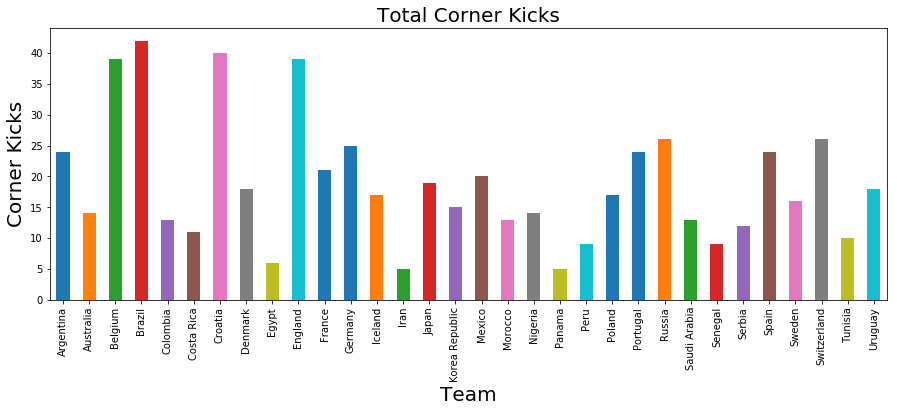

In [192]:
#Comparing the total corner kicks by each team throughout the tournament. Corner kicks create more opportunities for goals.
CornerGroups = df.groupby('Team')
CornerGroups.sum()['Corners']
plt.figure(figsize = (15,5))
plt.title('Total Corner Kicks', fontsize = 20)
plt.ylabel('Corner Kicks', fontsize = 20)
plt.xlabel('Teams', fontsize = 20)
CornerGroups.sum()['Corners'].plot(kind='bar')

Text(0.5,1,'Ball Possession')

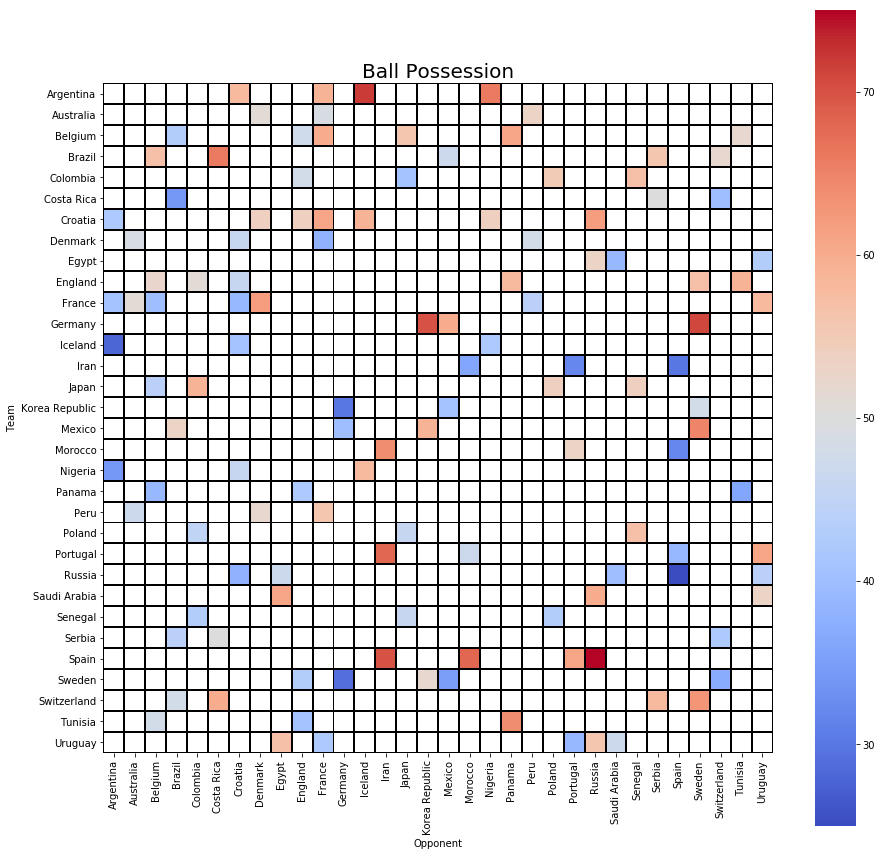

In [193]:
#Comparing ball possession between opponents. Usually team with the most ball possession has greater opportunities to create goals.
piv = pd.pivot_table(df, index='Team', values = 'Ball Possession %', columns = 'Opponent')
#piv
plt.figure(figsize = (15,15))
sns.heatmap(piv, square=True, cmap = 'coolwarm',linecolor='black',linewidths=1)
plt.title('Ball Possession', fontsize = 20)

Text(0.5,1,'Pass Accuracy')

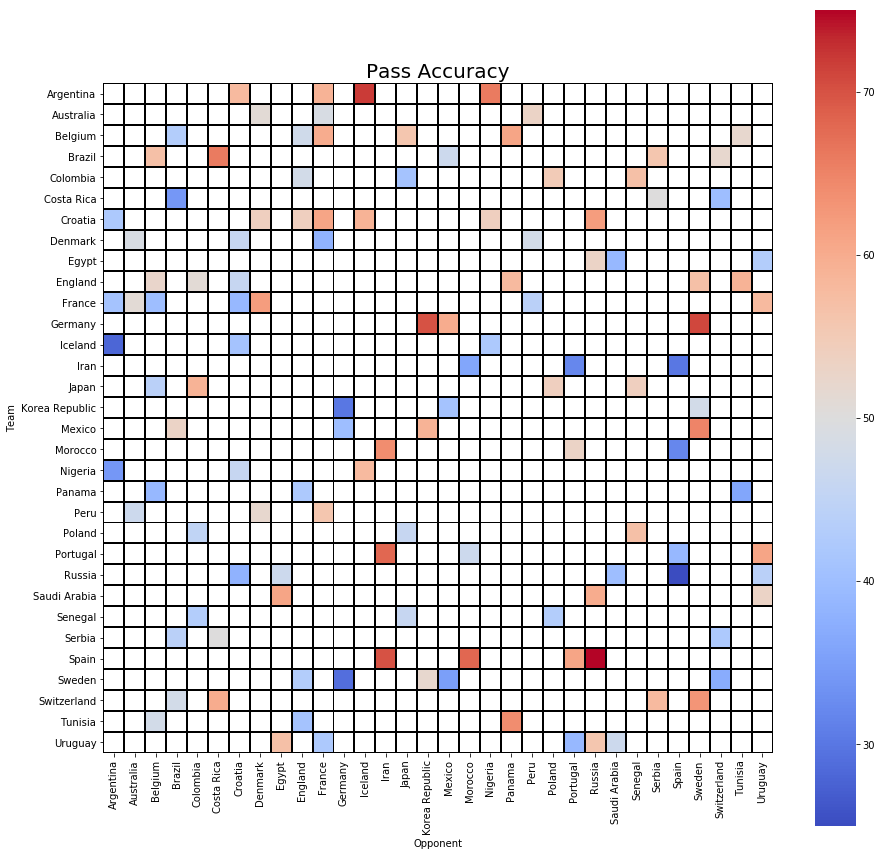

In [194]:
#Comparing pass accuracy between opponents. Pass accuracy can lead to greater opportunities to create goals.
piv_pass = pd.pivot_table(df, index='Team', values = 'Pass Accuracy %', columns = 'Opponent')
#piv
plt.figure(figsize = (15,15))
sns.heatmap(piv, square=True, cmap = 'coolwarm',linecolor='black',linewidths=1)
plt.title('Pass Accuracy', fontsize = 20)

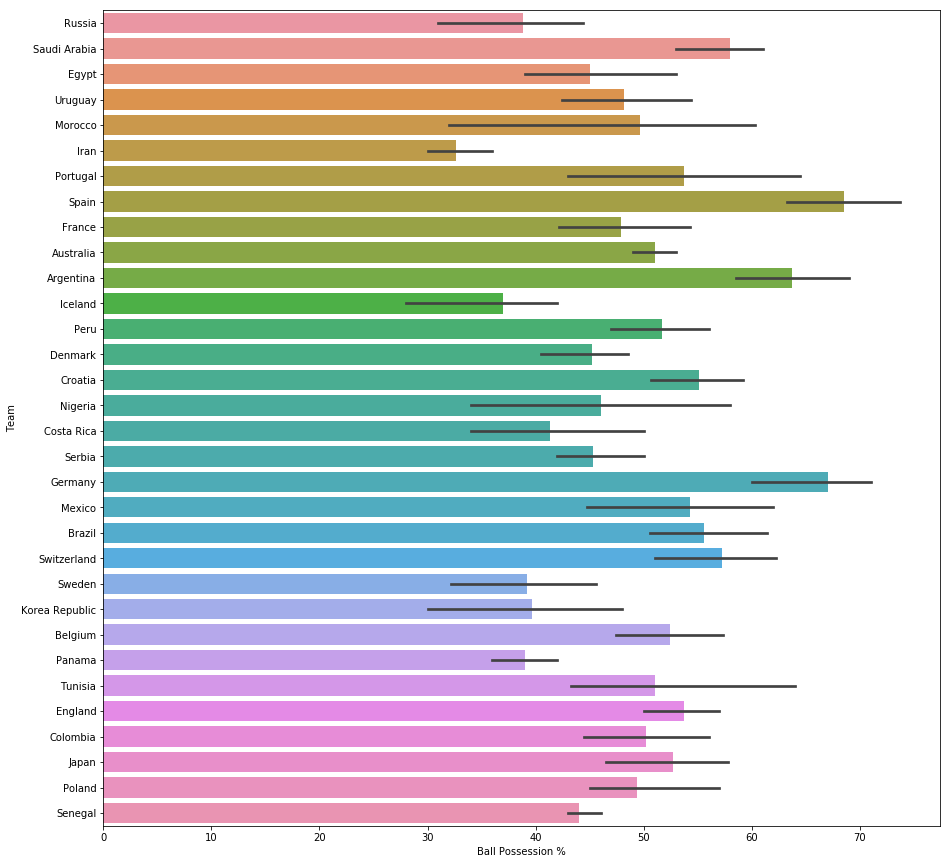

In [195]:
#Measuring mean Ball possession per team.
plt.figure(figsize = (15,15))
sns.barplot(x='Ball Possession %', y='Team', data=df,estimator=np.mean)

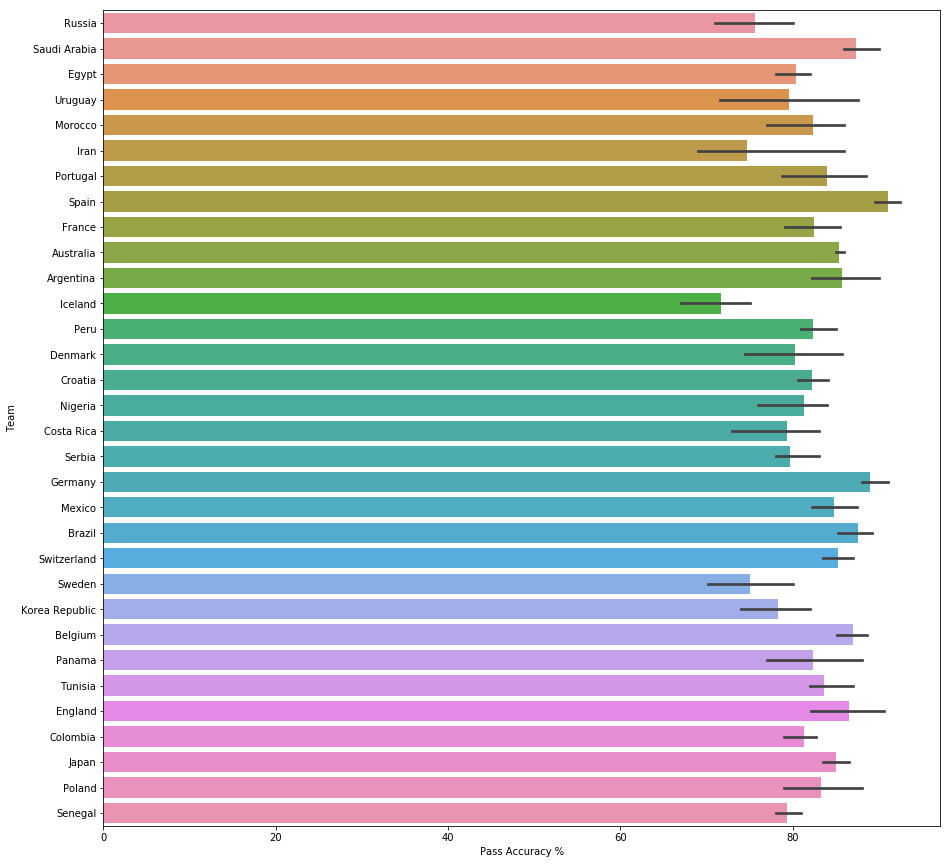

In [196]:
#Measuring mean Pass Accuracy per team.
plt.figure(figsize = (15,15))
sns.barplot(x='Pass Accuracy %', y='Team', data=df,estimator=np.mean)

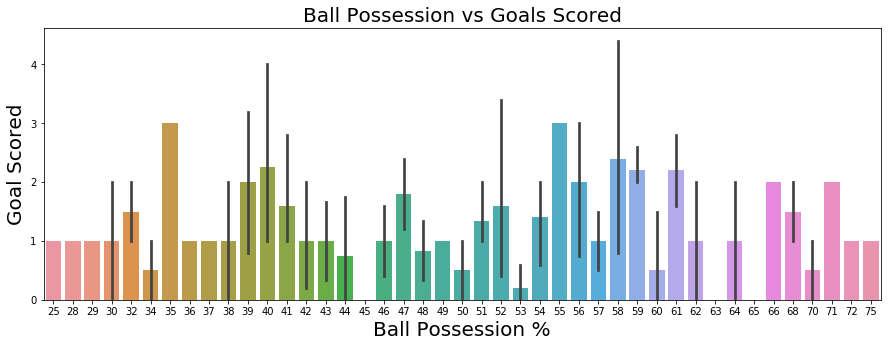

In [197]:
#Observing the relationship between Ball Possession and Goals Scored
plt.figure(figsize = (15,5))
plt.title('Ball Possession vs Goals Scored', fontsize = 20)
plt.ylabel('Goals Scored', fontsize = 20)
plt.xlabel('Ball Possession', fontsize = 20)
sns.barplot(x='Ball Possession %', y='Goal Scored', data=df)

In [198]:
#Removing NaN values in the Own Goal Column. Since no own goal was conceived it can be labeled as 0
def remove_nan(x):
    own_goal = x
    if pd.isnull(own_goal):
        return 0
    else:
        return own_goal

In [199]:
df['Own goals'] = df['Own goals'].apply(remove_nan)

In [200]:
df['Own goals'].head(20)

0     0.0
1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    1.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: Own goals, dtype: float64

In [201]:
#Converting a categorical column to implement in Logistic Regression Model
df['Binary_Man_of_Match'] = pd.get_dummies(df['Man of the Match'], drop_first = True)
df['Penalty_Shootout (yes/no)'] = pd.get_dummies(df['PSO'], drop_first = True)

In [202]:
#The following columns do not have a significant contribution to predicting who won the game.
df.drop(['Man of the Match', '1st Goal', 'Round', 'PSO', 'Own goal Time','Team','Opponent','Date'], axis = 1, inplace=True)

In [203]:
df.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO,Own goals,Binary_Man_of_Match,Penalty_Shootout (yes/no)
0,5,40,13,7,3,3,6,3,11,0,...,306,118,22,0,0,0,0,0.0,1,0
1,0,60,6,0,3,3,2,1,25,2,...,511,105,10,0,0,0,0,0.0,0,0
2,0,43,8,3,3,2,0,1,7,3,...,395,112,12,2,0,0,0,0.0,0,0
3,1,57,14,4,6,4,5,1,13,3,...,589,111,6,0,0,0,0,0.0,1,0
4,0,64,13,3,6,4,5,0,14,2,...,433,101,22,1,0,0,0,1.0,0,0


In [204]:
from sklearn.model_selection import train_test_split

In [205]:
#Our X variable will contain all the columns that have a strong correlation to predicting man of the match
X = df.drop('Binary_Man_of_Match', axis = 1)
#Using the Man of the match column for prediction
y = df['Binary_Man_of_Match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [206]:
from sklearn.linear_model import LogisticRegression 

In [207]:
logmodel = LogisticRegression()

In [208]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [209]:
predictions = logmodel.predict(X_test)

In [210]:
from sklearn.metrics import classification_report 

In [215]:
print(classification_report(y_test, predictions))
#In predicting the selected team not being MoM the model was 82% precise with a recall of 72%. 
#In other words 82% of selected columns were relevant in making this prediction of losers and
#72% relevant columns were selected.
#In predicting the selected team being MoM the model was 67% precise with a recall of 78%.
#72% of selected columns were relevant in making this prediction of winners and
#78% relevant columns were selected.

             precision    recall  f1-score   support

          0       0.82      0.72      0.77        25
          1       0.67      0.78      0.72        18

avg / total       0.75      0.74      0.75        43



In [216]:
from sklearn.metrics import confusion_matrix 

In [217]:
conf_mat = confusion_matrix(y_test, predictions)

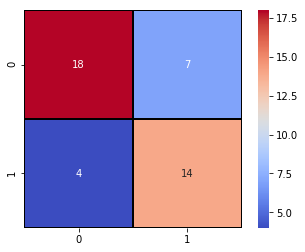

In [218]:
sns.heatmap(conf_mat, square=True, cmap = 'coolwarm',linecolor='black',linewidths=1, annot = True)
#True Negative:18 The model correctly predicted 18 teams who lost the game.
#False Negative:4 The model incorrectly predicted 4 teams who lost the game.
#False Positive:7 The Model incorrectly predicted 7 teams who won the game
#True Positive:14 The model correctly predicted 14 teams who won the game.

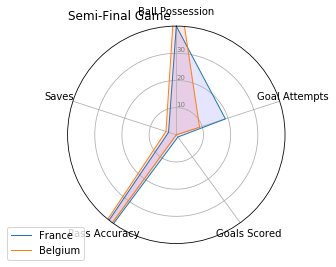

In [256]:
#This is used to compare the performance of France and Belgium in the semi-final game

df = pd.read_csv('FIFA 2018 Statistics.csv')

# Set data
df4 = pd.DataFrame({
'group': ['France','Belgium'],
'Ball Possession': np.array([df.iloc[120]['Ball Possession %'], df.iloc[121]['Ball Possession %']]),
'Pass Accuracy': np.array([df.iloc[120]['Pass Accuracy %'], df.iloc[121]['Pass Accuracy %']]),
'Goals Scored': np.array([df.iloc[120]['Goal Scored'], df.iloc[121]['Goal Scored']]),
'Saves': np.array([df.iloc[120]['Saves'], df.iloc[121]['Saves']]),
'Goal Attempts': np.array([df.iloc[120]['Attempts'], df.iloc[121]['Attempts']])
})


# ------- PART 1: Create background
 
# number of variable
categories=list(df4)[0:5]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

ax.set_title('Semi-Final Game', loc = 'left')

 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df4.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="France")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df4.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Belgium")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))




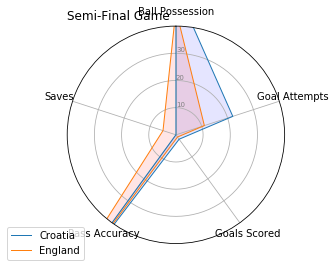

In [255]:
#This is used to compare the performance of Croatia and England in the semi-final game
# Set data
df3 = pd.DataFrame({
'group': ['Croatia','England'],
'Ball Possession': np.array([df.iloc[122]['Ball Possession %'], df.iloc[123]['Ball Possession %']]),
'Pass Accuracy': np.array([df.iloc[122]['Pass Accuracy %'], df.iloc[123]['Pass Accuracy %']]),
'Goals Scored': np.array([df.iloc[122]['Goal Scored'], df.iloc[123]['Goal Scored']]),
'Saves': np.array([df.iloc[122]['Saves'], df.iloc[123]['Saves']]),
'Goal Attempts': np.array([df.iloc[122]['Attempts'], df.iloc[123]['Attempts']])
})

#df2.set_index('group', inplace = True)


# ------- PART 1: Create background
 
# number of variable
categories=list(df3)[0:5]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

ax.set_title('Semi-Final Game', loc = 'left')
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df3.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Croatia")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df3.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="England")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

 


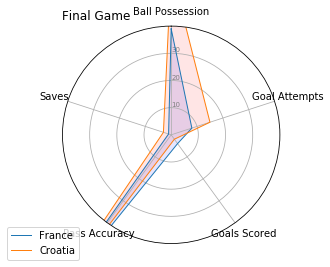

In [249]:
#This is used to compare the performance of France and Croatia in the final game
# Set data
df2 = pd.DataFrame({
'group': ['France','Croatia'],
'Ball Possession': np.array([df.iloc[126]['Ball Possession %'], df.iloc[127]['Ball Possession %']]),
'Pass Accuracy': np.array([df.iloc[126]['Pass Accuracy %'], df.iloc[127]['Pass Accuracy %']]),
'Goals Scored': np.array([df.iloc[126]['Goal Scored'], df.iloc[127]['Goal Scored']]),
'Saves': np.array([df.iloc[126]['Saves'], df.iloc[127]['Saves']]),
'Goal Attempts': np.array([df.iloc[126]['Attempts'], df.iloc[127]['Attempts']])
})

#'Fouls Committed': np.array([df.iloc[126]['Fouls Committed'], df.iloc[127]['Fouls Committed']])
#df2.set_index('group', inplace = True)


# ------- PART 1: Create background
 
# number of variable
categories=list(df2)[0:5]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

ax.set_title('Final Game', loc = 'left')
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df2.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="France")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df2.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Croatia")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

 
#From the radar chart, you can see Croatia outplayed France in the final game by 
#dominating in Ball possession, more goal attempts (though France had more goal attempts On-Target), saves, and pass accuracy.
#However, France scored the most goals and goals wins games.
 

In [252]:
df[df['Round'] == 'Final'][['Team', 'Opponent', 'Goal Scored', 'Attempts', 'On-Target', 'Saves', 'Pass Accuracy %']]

,Team,Opponent,Goal Scored,Attempts,On-Target,Saves,Pass Accuracy %
126,France,Croatia,4,8,6,1,75
127,Croatia,France,2,15,3,3,83
